# Creating synthetic data, the INTERACTIVE notebook

This IPython notebook is intended as a companion to my [Seismic Petrophysics](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/seismic_petrophysics.ipynb)  notebook to demonstrate how to use its [interactive cabalities](http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb). I'm sure this feature was introduced for educational purposes (or maybe simply to show off) but I can see a future where geophysicists will build some sort of interactive reports for asset teams or clients to allow them to do exploratory data analysis.

For all the details please refer to the above notebook and this github repo: <https://github.com/aadm/geophysical_notes>.

_Note: at the time of writing (November 2014), the interaction [is lost](http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb) when the notebooks are displayed through [nbviewer](http://nbviewer.ipython.org/), so you have to download them locally and run them from a working pyhton/Ipython installation. An alternative could be to use static widgets (see [Jake Vanderplas' article](http://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/) to allow some sort of interaction even without a working Python behind the scenes._

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.colors as colors
#      0=undef   1=bri  2=oil   3=gas 4=shale
ccc = ['#B3B3B3','blue','green','red','#996633',]
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

In [3]:
L=pd.read_csv('qsiwell2_frm.csv')

# plots

The following code builds a summary plot showing the following tracks, from left to right:

1. petrophysical logs
2. Ip log
3. Vp/Vs log
4. litho-facies class

To the extreme right I have an interactive Ip-Vp/Vs crossplot; two sliders are used to select top and bottom limits (in meters) of the analysis window where data is dynamically taken to populate this crossplot.

As a visual aid, the extend of the analysis window is displayed as a transparent rectangle in the first track.

Select top (z1) and bottom (z2) of analysis window to populate Ip-Vp/Vs crossplot.
Analysis window will be highlighted in yellow in leftmost track.


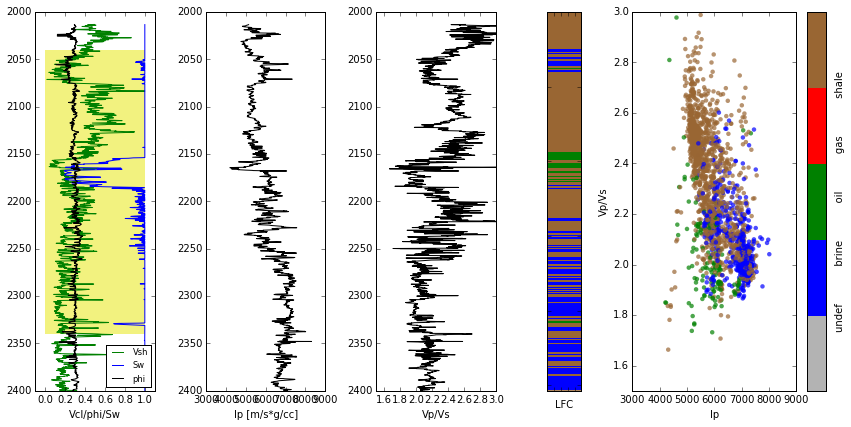

In [6]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
    
def crossplot(z1=2040,z2=2340):
    from matplotlib.patches import Rectangle
    ll=L.ix[(L.DEPTH>=2000) & (L.DEPTH<=2400)]
    cluster=np.repeat(np.expand_dims(ll['LFC'].values,1),100,1)
    
    fig = plt.figure(figsize=(12, 6))
    ax0 = plt.subplot2grid((1,10), (0,0), colspan=2)
    ax1 = plt.subplot2grid((1,10), (0,2), colspan=2,sharey=ax0)
    ax2 = plt.subplot2grid((1,10), (0,4), colspan=2,sharey=ax0)
    ax3 = plt.subplot2grid((1,10), (0,6))
    ax4 = plt.subplot2grid((1,10), (0,7), colspan=3)
    
    ax0.plot(ll.VSH, ll.DEPTH, '-g', label='Vsh')
    ax0.plot(ll.SW, ll.DEPTH, '-b', label='Sw')
    ax0.plot(ll.PHI, ll.DEPTH, '-k', label='phi')
    ax1.plot(ll.IP, ll.DEPTH, '-k')
    ax2.plot(ll.VPVS, ll.DEPTH, '-k')
    im=ax3.imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)  
    ll=L.ix[(L.DEPTH>=z1) & (L.DEPTH<=z2)]
    ax4.scatter(ll.IP,ll.VPVS,20,ll.LFC,marker='o',edgecolors='none',alpha=0.7,cmap=cmap_facies,vmin=0,vmax=4)

    ax0.invert_yaxis(), ax3.set_yticklabels([]), ax3.set_xticklabels([])
    ax0.legend(fontsize='small', loc='lower right')
    ax0.set_xlabel('Vcl/phi/Sw'),ax0.set_xlim(-.1,1.1)
    ax1.set_xlabel('Ip [m/s*g/cc]'),ax1.set_xlim(3000,9000)
    ax2.set_xlabel('Vp/Vs'),ax2.set_xlim(1.5,3)
    ax3.set_xlabel('LFC')
    ax4.set_xlabel('Ip'),ax4.set_ylabel('Vp/Vs'),ax4.set_xlim(3000,9000),ax4.set_ylim(1.5,3); 
    fig.tight_layout() 
    
    cbar=plt.colorbar(im, ax=ax4)
#     cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
#     cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1));
    cbar.set_label((12*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    ax0.add_patch(Rectangle((0, z1),1,z2-z1,edgecolor='None',facecolor=[0.9,0.9,0.0],alpha=0.5))

interact(crossplot, z1=(2000,2360,40),z2=(2040,2400,40))
print('Select top (z1) and bottom (z2) of analysis window to populate Ip-Vp/Vs crossplot.')
print('Analysis window will be highlighted in yellow in leftmost track.')

# comparing augmented well data and synthetic data

First I read in previously computed _augmented_ (i.e., a dataset containing original plus fluid-replaced logs simulating different pore fluid scenarios) and _synthetic_ (i.e., created through Monte Carlo simulation) data.

Then I show side by side the two datasets, color-coded by litho-fluid class; a slider is used to select one of the 4 available classes.

In [8]:
ww=pd.read_csv('qsiwell2_augmented.csv')
mc=pd.read_csv('qsiwell2_synthetic.csv')

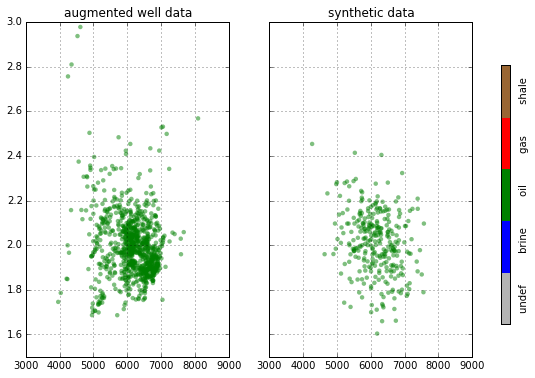

In [12]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

def crossplot(n=1):
    f, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(8, 6))
    scatt1=ax[0].scatter(ww.IP[ww.LFC==n],ww.VPVS[ww.LFC==n],20,ww.LFC[ww.LFC==n],marker='o',edgecolors='none', alpha=0.5, cmap=cmap_facies,vmin=0,vmax=4)
    scatt2=ax[1].scatter(mc.IP[mc.LFC==n],mc.VPVS[mc.LFC==n],20,mc.LFC[mc.LFC==n],marker='o',edgecolors='none', alpha=0.5, cmap=cmap_facies,vmin=0,vmax=4)
    ax[0].set_xlim(3000,9000), ax[0].set_ylim(1.5,3.0)
    ax[0].set_title('augmented well data');
    ax[1].set_title('synthetic data');
    for i in range(len(ax)): ax[i].grid()  
    uu=f.add_axes([0.95, 0.2, 0.015, 0.6])
    cbar=f.colorbar(scatt2, cax=uu);
    cbar.set_label((10*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar.set_alpha(1)
    cbar.draw_all()


    return n

interact(crossplot, n=(1,4))
print('Select Litho-Fluid Class: n=1 (brine), 2 (oil), 3 (gas), 4 (shale)')

And this is a second qc, showing a comparison between the Ip and Vp/Vs PDFs calculated for real (augmented) vs synthetic datasets, with the possibility to slide through the different classes.

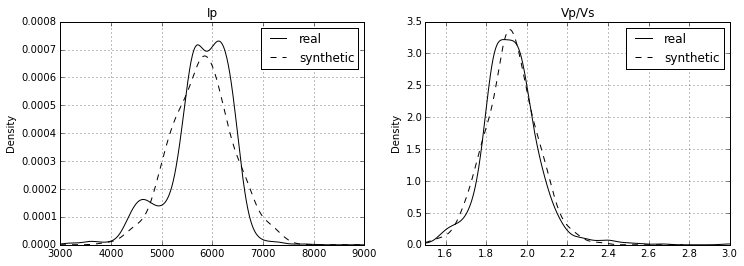

In [13]:
def histcompare(n):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ww[ww.LFC==n]['IP'].plot(kind='density',style='k-',ax=ax[0],label='real',legend=True,title='Ip')
    mc[mc.LFC==n]['IP'].plot(kind='density',style='k--',ax=ax[0],label='synthetic',legend=True)
    ax[0].set_xlim(3000,9000)
    ww[ww.LFC==n]['VPVS'].plot(kind='density',style='k-',ax=ax[1],label='real',legend=True,title='Vp/Vs')
    mc[mc.LFC==n]['VPVS'].plot(kind='density',style='k--',ax=ax[1],label='synthetic',legend=True)
    ax[1].set_xlim(1.5,3.0)
    return n

interact(histcompare, n=(1,4))
print('Select Litho-Fluid Class: n=1 (brine), 2 (oil), 3 (gas), 4 (shale)')